In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
# Chargement des données
data = load_digits()
X_full = data.data
y_full = data.target

In [3]:
# Paramètres
batch_size = 100
n_samples, n_features = X_full.shape
n_batches = n_samples // batch_size

In [4]:
# Initialisation
mean_global = np.zeros(n_features)
cov_matrix = np.zeros((n_features, n_features))
total_samples = 0

In [5]:
# Traitement par mini-lots
for i in range(n_batches):
    start = i * batch_size
    end = start + batch_size
    X_batch = X_full[start:end]

    # Mise à jour de la moyenne globale
    batch_mean = np.mean(X_batch, axis=0)
    batch_centered = X_batch - batch_mean
    mean_global = (total_samples * mean_global + batch_size * batch_mean) / (total_samples + batch_size)

    # Mise à jour de la matrice de covariance
    cov_matrix += batch_centered.T @ batch_centered
    total_samples += batch_size

In [6]:
# Normalisation de la covariance (diviser par total_samples - 1)
cov_matrix /= (total_samples - 1)

In [7]:
# ACP classique à partir de la covariance finale
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]

In [8]:
# Recentrer les données globalement
X_centered = X_full - mean_global
X_pca_2D = X_centered @ eigenvectors[:, :2]

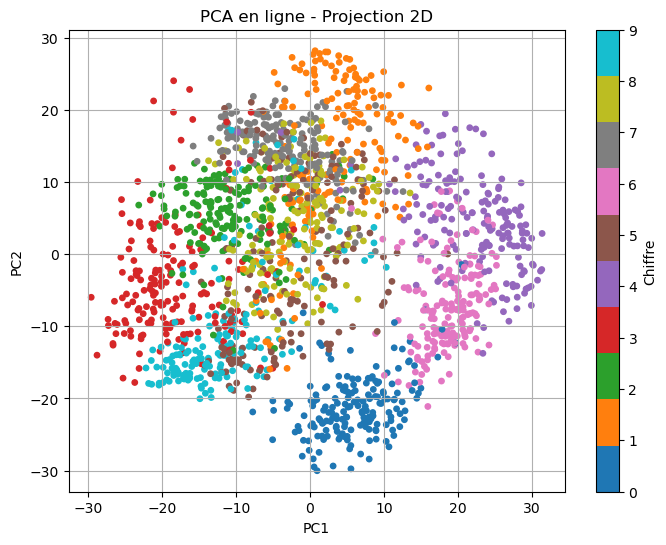

In [9]:
# Affichage
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2D[:, 0], X_pca_2D[:, 1], c=y_full, cmap='tab10', s=15)
plt.title("PCA en ligne - Projection 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Chiffre")
plt.grid(True)
plt.show()